In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import mysql
import mysql.connector

In [2]:
#### HOW TO CONNECT PYTHON AND MYSQL DATABASE ####

# import mysql
# import mysql.connector

# db = mysql.connector.connect(host="localhost",user="root",passwd="akash_sql",
#                             database="sports") # if database is not there in mysql database then first create the database
# mycursor = db.cursor()
# mycursor.execute("create database sports") # if database is not there in mysql database then run this line first

#for x in mycursor:
#    print(x)

In [3]:
#### HOW TO CREATE a TABLE IN MYSQL DATABASE USING CSV FILE ####

# First Read .csv file and take care of 'None' or 'NA' values
# sports = pd.read_csv(r"E:\LEARNING__Courses__Deep Learning\SQL__MySQL__NoSQL\Coursera_SQL Project\SportsStats\athlete_events.csv"
# sports=sports.fillna(0)


#if db.is_connected():
#    mycursor = db.cursor()
#    mycursor.execute("select database();")
#    record = mycursor.fetchone()
#    print("You're connected to database: ", record)
#    mycursor.execute("DROP TABLE IF EXISTS Athlete_events;")
#    print('Creating table....')
#    mycursor.execute("Create Table Athlete_events (ID int NOT NULL, Name varchar(255) NOT NULL, sex varchar(20) NOT NULL, Age int NOT NULL, Height float(5,1) NOT NULL, Weight float(5,1) NOT NULL, Team varchar(255) NOT NULL, NOC varchar(50) NOT NULL, Games varchar(50) NOT NULL, Year int(4) NOT NULL, Season varchar(6) NOT NULL, City varchar(50) NOT NULL, Sport varchar(50) NOT NULL, Event varchar(255) NOT NULL, Medal varchar(10) NOT NULL)")
#    print("Table is created....")
#    for i,row in sports.iterrows():
#        sql = "INSERT INTO sports.athlete_events VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
#        mycursor.execute(sql, tuple(row))
#        print("Record inserted")
#        # the connection is not auto committed by default, so we must commit to save our changes
#        db.commit()

In [4]:
#### BASIC COMMANDS IN SQL ####

# mycursor.execute("use database_name")
# mycursor.execute("create database sports")
# mycursor.execute("drop database akkiabc")
# mycursor.execute("show databases")
# mycursor.execute("show tables")
# mycursor.execute("Describe athlete_events")

In [5]:
#### SOME OF PANDAS SYNTAX ####

#sports = pd.read_csv(r"E:\LEARNING__Courses__Deep Learning\SQL__MySQL__NoSQL\Coursera_SQL Project\SportsStats\athlete_events.csv")
#sports.info()
#sports['Age'] = sports['Age'].fillna(0)
#convert_dict = {'Age':np.int64}
#sports = sports.astype(convert_dict)
#sports['Age'].dtype
#sports.head(10)
#sports.Year.hist()
#sports.loc[sports['Age']==sports.Age.max()]
#print(sports.Medal=='Gold')
#print(len(sports[(sports.Medal=='Gold') & (sports.Team == 'United States')]))
#print(sports[sports.Medal=='Gold'])

In [6]:
sports = pd.read_csv(r"E:\LEARNING__Courses__Deep Learning\SQL__MySQL__NoSQL\Coursera_SQL Project\Coursera_Course 4_SQL_Material_Slides\SportsStats\athlete_events.csv")

In [7]:
nocReg = pd.read_csv(r"E:\LEARNING__Courses__Deep Learning\SQL__MySQL__NoSQL\Coursera_SQL Project\Coursera_Course 4_SQL_Material_Slides\SportsStats\noc_regions.csv")

# A Short Look-up over Data

In [8]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
sports.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.003631,-0.011141,-0.009176,0.011885
Age,-0.003631,1.000000,0.138246,0.212069,-0.115137
Height,-0.011141,0.138246,1.000000,0.796213,0.047578
Weight,-0.009176,0.212069,0.796213,1.000000,0.019095
Year,0.011885,-0.115137,0.047578,0.019095,1.000000


In [10]:
#import seaborn as sns
#sns.heatmap(sports[['Age','Height','Weight','Year']], annot=True)

In [11]:
pysqldf("SELECT * FROM sports")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [12]:
pysqldf("SELECT * FROM nocReg")

,NOC,region,notes
0,AFG,Afghanistan,None
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,None
3,ALG,Algeria,None
4,AND,Andorra,None
...,...,...,...
225,YEM,Yemen,None
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,None


# Initial Data Exploration

In [13]:
pysqldf("SELECT count(DISTINCT NOC) from sports")

,count(DISTINCT NOC)
0,230


In [14]:
total_medal_won_country = pysqldf("SELECT team, count(*) AS total_medal from sports where medal <> 'None' group by team order by count(*) DESC limit 10")
print(total_medal_won_country)

            Team  total_medal
0  United States         5219
1   Soviet Union         2451
2        Germany         1984
3  Great Britain         1673
4         France         1550
5          Italy         1527
6         Sweden         1434
7      Australia         1306
8         Canada         1243
9        Hungary         1127


<AxesSubplot:xlabel='Team'>

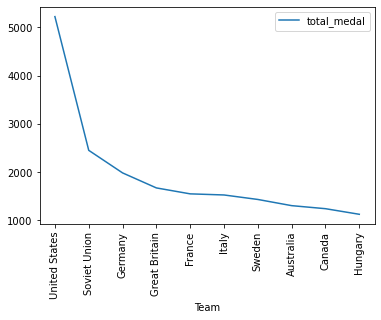

In [15]:
total_medal_won_country.plot('Team','total_medal', xticks=range(0,10), rot=90)

In [16]:
countries = pysqldf("SELECT team from sports where medal <> 'None' group by team order by count(*) DESC limit 10")
def top_10_countries(year):
    result = pysqldf(f"""SELECT team from sports where year={year} AND medal <> 'None' group by team order by count(*) DESC limit 10""")
    result.rename(columns = {'Team' : f"{year}"}, inplace = True)
    return countries.join(result[f"{year}"])

In [17]:
for i in pysqldf("SELECT DISTINCT year FROM sports order by year DESC")['Year'].values.tolist():
    countries = top_10_countries(i)

In [18]:
countries

,Team,2016,2014,2012,2010,2008,2006,2004,2002,2000,...,1932,1928,1924,1920,1912,1908,1906,1904,1900,1896
0,United States,United States,Canada,United States,United States,United States,Canada,United States,Canada,United States,...,United States,United States,United States,United States,Sweden,Great Britain,France,United States,France,Greece
1,Soviet Union,Germany,Russia,Russia,Canada,China,Sweden,Russia,United States,Russia,...,Italy,Germany,France,Belgium,Great Britain,Sweden,Denmark,Germany,United States,Germany
2,Germany,Great Britain,United States,Great Britain,Finland,Australia,United States,Australia,Germany,Australia,...,Germany,Italy,Great Britain,Sweden,United States,United States,Great Britain,Galt Football Club,Union des Socits Franais de Sports Athletiques,United States
3,Great Britain,Russia,Sweden,China,Germany,Russia,Germany,Germany,Norway,Germany,...,Canada,Great Britain,Sweden,France,Denmark,Norway,Germany,Winnipeg Shamrocks-1,Great Britain,France
4,France,China,Norway,Australia,Norway,Germany,Finland,Italy,Russia,Netherlands,...,France,Netherlands,Finland,Great Britain,Norway,Canada,Greece,St. Rose-2,Minerva Amsterdam,Great Britain
5,Italy,France,Finland,Germany,Austria,Great Britain,Russia,Japan,Sweden,South Korea,...,Hungary,Sweden,Switzerland,Italy,Finland,France,Norway,St. Louis Amateur Athletic Association,Switzerland,Hungary
6,Sweden,Australia,Germany,Japan,Russia,France,Austria,China,Switzerland,Italy,...,Great Britain,France,Italy,Norway,Germany,Finland,United States,Mohawk Indians-2,Moseley Wanderers,Denmark
7,Australia,Italy,Netherlands,France,Sweden,Brazil,Czech Republic,Netherlands,Austria,Cuba,...,Finland,Canada,Belgium,Denmark,Hungary,Belgium,"Phalainis ton Thorichtou ""Hydra""-2",Missouri Athletic Club-3,Frankfurt Club,Austria
8,Canada,Canada,Switzerland,Netherlands,South Korea,South Korea,Norway,Cuba,Italy,China,...,Japan,Switzerland,Norway,Finland,Netherlands,Hungary,"Marinai della nave da guerra ""Varese""",Christian Brothers' College-1,Belgium,Switzerland
9,Hungary,Japan,Austria,Italy,China,Spain,Italy,Great Britain,China,France,...,Sweden,Finland,Canada,Netherlands,Italy,Germany,Sweden,Chicago Athletic Association-2,USFSA,Greece-1


In [19]:
medal_count = pysqldf("SELECT team, count(*) AS total_medal from sports where medal <> 'None' group by team order by count(*) DESC limit 5")
print(medal_count)
medal_count.drop(1, inplace=True)
medal_count.reset_index(inplace=True)
medal_count.drop('index', axis=1, inplace=True)
print('--------------------------------------------------')
print(medal_count)

            Team  total_medal
0  United States         5219
1   Soviet Union         2451
2        Germany         1984
3  Great Britain         1673
4         France         1550
--------------------------------------------------
            Team  total_medal
0  United States         5219
1        Germany         1984
2  Great Britain         1673
3         France         1550


In [20]:
countries = medal_count['Team'].values.tolist()
years = pysqldf("SELECT DISTINCT year FROM sports order by year DESC")['Year'].values.tolist()

In [21]:
country_medal = pd.DataFrame(columns=medal_count.columns.values.tolist())
country_medal['Team'] = medal_count['Team']
country_medal['total_medal'] = medal_count['total_medal']

In [22]:
country_vs_year = country_medal

In [23]:
for i in years:
    for j in countries:
        result = pysqldf(f"""SELECT count(*) AS total_medal from sports where year = '{i}' AND Team = '{j}' AND medal <> 'None' group by team order by total_medal""")
        try:
            country_vs_year.loc[countries.index(j),str(i)] = result.loc[0,'total_medal']
        except:
            country_vs_year.loc[countries.index(j),str(i)] = 0

In [24]:
country_vs_years = country_vs_year.drop('total_medal', axis=1)
country_vs_years.set_index('Team',inplace=True)
country_vs_years

,2016,2014,2012,2010,2008,2006,2004,2002,2000,1998,...,1932,1928,1924,1920,1912,1908,1906,1904,1900,1896
Team,,,,,,,,,,,,,,,,,,,,,
United States,256.0,52.0,238.0,89.0,309.0,48.0,259.0,70.0,240.0,30.0,...,190.0,92.0,186.0,194.0,107.0,65.0,24.0,199.0,45.0,20.0
Germany,157.0,32.0,92.0,42.0,96.0,44.0,147.0,49.0,116.0,34.0,...,53.0,77.0,0.0,0.0,39.0,19.0,30.0,15.0,2.0,31.0
Great Britain,145.0,10.0,122.0,1.0,81.0,1.0,55.0,6.0,52.0,4.0,...,33.0,59.0,82.0,101.0,128.0,167.0,31.0,2.0,22.0,7.0
France,96.0,18.0,78.0,14.0,77.0,15.0,53.0,13.0,64.0,13.0,...,42.0,46.0,109.0,134.0,23.0,36.0,45.0,1.0,75.0,11.0


In [25]:
country_vs_years = country_vs_years.T

In [26]:
country_vs_years.reset_index(inplace=True)
country_vs_years.rename(columns = {'index' : 'Year'}, inplace = True)

In [27]:
country_vs_years.index.rename('index')

RangeIndex(start=0, stop=35, step=1, name='index')

In [28]:
country_vs_parti = country_medal

In [29]:
for i in years:
    for j in countries:
        result = pysqldf(f"""SELECT count(*) AS Participants from sports where year = '{i}' AND Team = '{j}' group by team order by Participants""")
        try:
            country_vs_parti.loc[countries.index(j),str(i)] = result.loc[0,'Participants']
        except:
            country_vs_parti.loc[countries.index(j),str(i)] = 0

In [53]:
country_vs_parti_ = country_vs_parti

In [55]:
country_vs_parti_ = country_vs_parti_.drop('total_medal', axis=1)
country_vs_parti_ = country_vs_parti_.T
country_vs_parti_.columns = country_vs_parti_.iloc[0]
country_vs_parti_ = country_vs_parti_.drop('Team', axis=0)

In [45]:
country_vs_parti_.reset_index(inplace=True)
country_vs_parti_.rename(columns = {'index' : 'Year'}, inplace = True)

<AxesSubplot:xlabel='Year'>

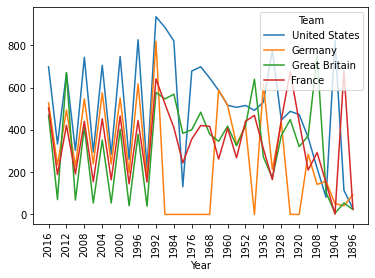

In [65]:
country_vs_parti_.plot(x="Year", y=["United States", "Germany", "Great Britain", "France"], xticks=range(0,35,2),rot = 90)

<AxesSubplot:xlabel='Year'>

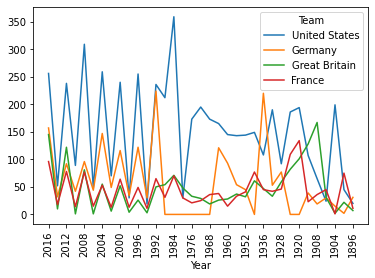

In [66]:
country_vs_years.plot(x="Year", y=["United States", "Germany", "Great Britain", "France"],xticks=range(0,35,2),rot = 90)

In [67]:
comparison = pd.concat([country_vs_years,country_vs_parti_], axis = 1)
comparison.columns = ['Year', 'USA', 'DE', 'UK', 'FRA', 'delete', 'USA_', 'DE_', 'UK_', 'FRA_']
comparison.drop('delete', axis=1, inplace=True)

In [79]:
comparison

,Year,USA,DE,UK,FRA,USA_,DE_,UK_,FRA_
0,2016,256.0,157.0,145.0,96.0,699.0,528.0,470.0,504.0
1,2014,52.0,32.0,10.0,18.0,333.0,235.0,70.0,189.0
2,2012,238.0,92.0,122.0,78.0,669.0,494.0,672.0,422.0
3,2010,89.0,42.0,1.0,14.0,303.0,227.0,68.0,192.0
4,2008,309.0,96.0,81.0,77.0,744.0,547.0,413.0,441.0
5,2006,48.0,44.0,1.0,15.0,295.0,239.0,54.0,155.0
6,2004,259.0,147.0,55.0,53.0,706.0,576.0,352.0,453.0
7,2002,70.0,49.0,6.0,13.0,285.0,239.0,54.0,164.0
8,2000,240.0,116.0,52.0,64.0,748.0,551.0,403.0,466.0
9,1998,30.0,34.0,4.0,13.0,260.0,197.0,41.0,145.0


In [83]:
convert_dict = {'USA_':np.float64,'DE_':np.float64,'FRA_':np.float64,'UK_':np.float64}
comparison = comparison.astype(convert_dict)

In [86]:
print(comparison['USA'].corr(comparison['USA_']))
print(comparison['DE'].corr(comparison['DE_']))
print(comparison['FRA'].corr(comparison['FRA_']))
print(comparison['UK'].corr(comparison['UK_']))

0.8979110672632578
0.9340165605267345
0.7067951097612584
0.7151737482813277


In [87]:
pysqldf("SELECT season, team, count(*) AS total_medal from sports where medal <> 'None' AND season = 'Winter' group by team order by count(*) DESC limit 5")

,Season,Team,total_medal
0,Winter,Canada,575
1,Winter,United States,533
2,Winter,Norway,443
3,Winter,Sweden,428
4,Winter,Finland,426


In [88]:
pysqldf("SELECT season, team, count(*) AS total_medal from sports where medal <> 'None' AND season = 'Summer' group by team order by count(*) DESC limit 5")

,Season,Team,total_medal
0,Summer,United States,4686
1,Summer,Soviet Union,2061
2,Summer,Germany,1687
3,Summer,Great Britain,1598
4,Summer,France,1408


In [89]:
pysqldf("SELECT season, team, count(*) AS total_participants from sports where season = 'Winter' group by team order by count(*) DESC limit 5")

,Season,Team,total_participants
0,Winter,United States,3321
1,Winter,Canada,2590
2,Winter,Norway,2328
3,Winter,Sweden,2231
4,Winter,Italy,2209


In [90]:
pysqldf("SELECT season, team, count(*) AS total_participants from sports where season = 'Summer' group by team order by count(*) DESC limit 5")

,Season,Team,total_participants
0,Summer,United States,14526
1,Summer,Great Britain,10309
2,Summer,France,10021
3,Summer,Italy,8051
4,Summer,Germany,7378


In [177]:
season_vs_parti = pysqldf("SELECT Games, count(*) AS Participants from sports group by Games order by Games")

In [193]:
season_vs_parti.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
Games,1896 Summer,1900 Summer,1904 Summer,1906 Summer,1908 Summer,1912 Summer,1920 Summer,1924 Summer,1924 Winter,1928 Summer,...,1998 Winter,2000 Summer,2002 Winter,2004 Summer,2006 Winter,2008 Summer,2010 Winter,2012 Summer,2014 Winter,2016 Summer
Participants,380,1936,1301,1733,3101,4040,4292,5233,460,4992,...,3605,13821,4109,13443,4382,13602,4402,12920,4891,13688


<AxesSubplot:xlabel='Games'>

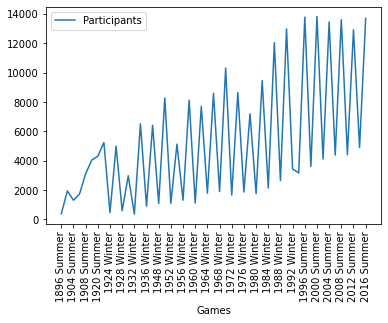

In [185]:
season_vs_parti.plot(x="Games", y="Participants",xticks=range(0,51,2),rot = 90)

In [191]:
pysqldf("SELECT season, count(*) AS no_participants, count(Distinct Games) AS no_times from sports group by season")

,Season,no_participants,no_times
0,Summer,222552,29
1,Winter,48564,22


In [198]:
pysqldf("SELECT season, count(*) AS no_medals from sports where medal <> 'None' group by season")

,Season,no_medals
0,Summer,34088
1,Winter,5695


In [200]:
pysqldf("SELECT sport, season, count(*) AS no_medals from sports where medal <> 'None'group by sport order by no_medals").T

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
Sport,Aeronautics,Basque Pelota,Jeu De Paume,Roque,Motorboating,Croquet,Racquets,Military Ski Patrol,Cricket,Alpinism,...,Cycling,Wrestling,Hockey,Ice Hockey,Football,Fencing,Gymnastics,Rowing,Swimming,Athletics
Season,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Winter,Summer,Winter,...,Summer,Summer,Summer,Winter,Summer,Summer,Summer,Summer,Summer,Summer
no_medals,1,2,3,3,7,8,10,12,24,25,...,1263,1296,1528,1530,1571,1743,2256,2945,3048,3969


In [207]:
pysqldf("SELECT sport, season, count(*) AS no_medals from sports where medal <> 'None' AND season = 'Winter' group by sport order by no_medals").T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Sport,Military Ski Patrol,Alpinism,Skeleton,Snowboarding,Freestyle Skiing,Curling,Nordic Combined,Luge,Ski Jumping,Short Track Speed Skating,Figure Skating,Bobsleigh,Biathlon,Alpine Skiing,Speed Skating,Cross Country Skiing,Ice Hockey
Season,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter
no_medals,12,21,30,90,102,152,165,180,207,284,359,398,408,428,580,776,1503


In [206]:
pysqldf("SELECT sport, season, count(*) AS no_medals from sports where medal <> 'None' AND season = 'Summer' group by sport order by no_medals").T

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
Sport,Aeronautics,Basque Pelota,Jeu De Paume,Roque,Alpinism,Motorboating,Croquet,Racquets,Cricket,Figure Skating,...,Sailing,Cycling,Wrestling,Hockey,Football,Fencing,Gymnastics,Rowing,Swimming,Athletics
Season,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,...,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer
no_medals,1,2,3,3,4,7,8,10,24,27,...,1232,1263,1296,1528,1571,1743,2256,2945,3048,3969
